OBSERVATIONS

g:  3x120s\
r:  3x120s\
i:  3x180s\
Ha: 1x900s + 4x300s\
Hb: 4x1200s

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import glob
from astropy.io import fits
from matplotlib.colors import LogNorm

from scipy.optimize import curve_fit

from astropy.io.fits import open as fits_open
import os


In [2]:
# Path to the dark FITS files

input_dir = "data/dark_30_10_2024"

dark = []

for file_name in os.listdir(input_dir):
    #if file_name.endswith(".fit"):
    # Extract the exposure time from the file name
    parts = file_name.split('_')
    exposure_time = float(parts[-1].replace('.fit', '').replace('dark', ''))  

    # Open the FITS file
    file_path = os.path.join(input_dir, file_name)
    with fits_open(file_path) as hdul:
        dark.append({
            "data": hdul[0].data,
            "exposure_time": exposure_time,
            "name": "30_10_2024"
        })


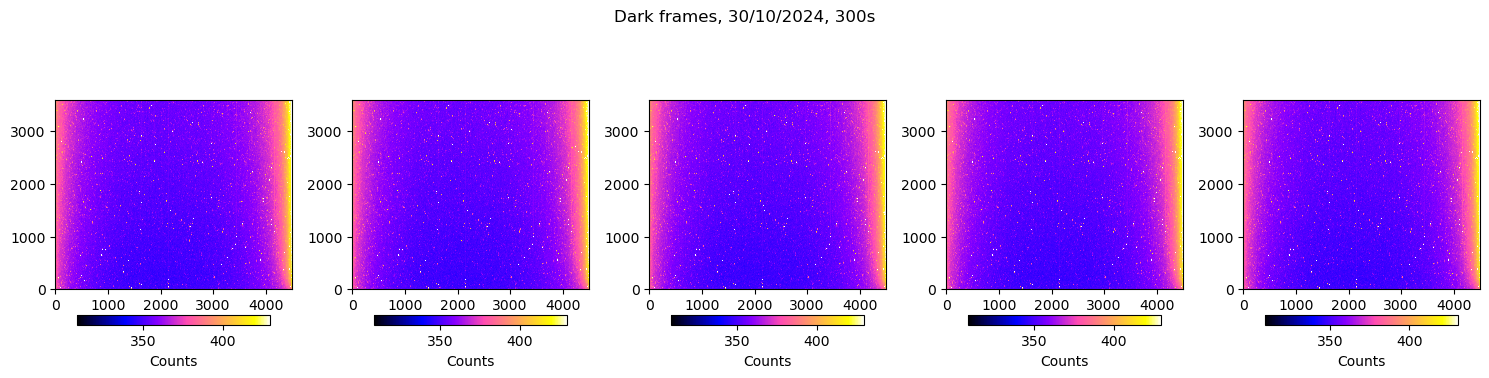

In [3]:
fig, ax = plt.subplots(1,5,figsize=(15,4))
fig.suptitle("Dark frames, 30/10/2024, 300s")

dark_300 = [entry["data"] for entry in dark if entry["exposure_time"] == 300]

for i in range(5):
    
    im = ax[i].imshow(dark_300[i], clim=np.quantile(dark_300[i], [0.01, 0.99]), cmap='gnuplot2', origin='lower')  # Use clim to scale the image based on the 1st and 99th quantiles
    plt.colorbar(im, ax=ax[i], location='bottom', fraction=0.0375, pad=0.1, label="Counts")  # Make sure to use the `im` object for colorbar
    #ax[i].set(xlabel="X Pixel",ylabel="Y Pixel")

#plt.subplots_adjust(bottom=0.15) 
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


In [4]:
dark_300_stack = np.stack(dark_300, axis=0)  
dark_300_mean = np.mean(dark_300_stack, axis=0)  # or median?????

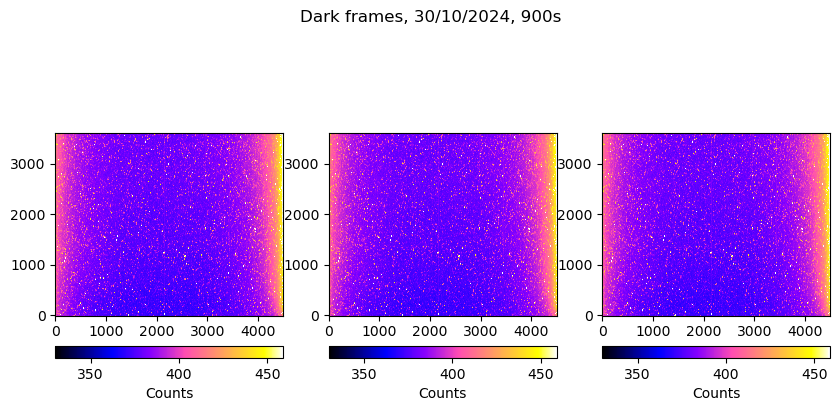

In [5]:
fig, ax = plt.subplots(1,3,figsize=(10,4))
fig.suptitle("Dark frames, 30/10/2024, 900s")

dark_900 = [entry["data"] for entry in dark if entry["exposure_time"] == 900]

for i in range(3):
    
    im = ax[i].imshow(dark_900[i], clim=np.quantile(dark_900[i], [0.01, 0.99]), cmap='gnuplot2', origin='lower')  # Use clim to scale the image based on the 1st and 99th quantiles
    plt.colorbar(im, ax=ax[i], location='bottom', fraction=0.0375, pad=0.1, label="Counts")  # Make sure to use the `im` object for colorbar
    #ax[i].set(xlabel="X Pixel",ylabel="Y Pixel")

#plt.subplots_adjust(bottom=0.15) 
#plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()



In [6]:
dark_900_stack = np.stack(dark_900, axis=0)  
dark_900_mean = np.mean(dark_900_stack, axis=0)  # or median?????

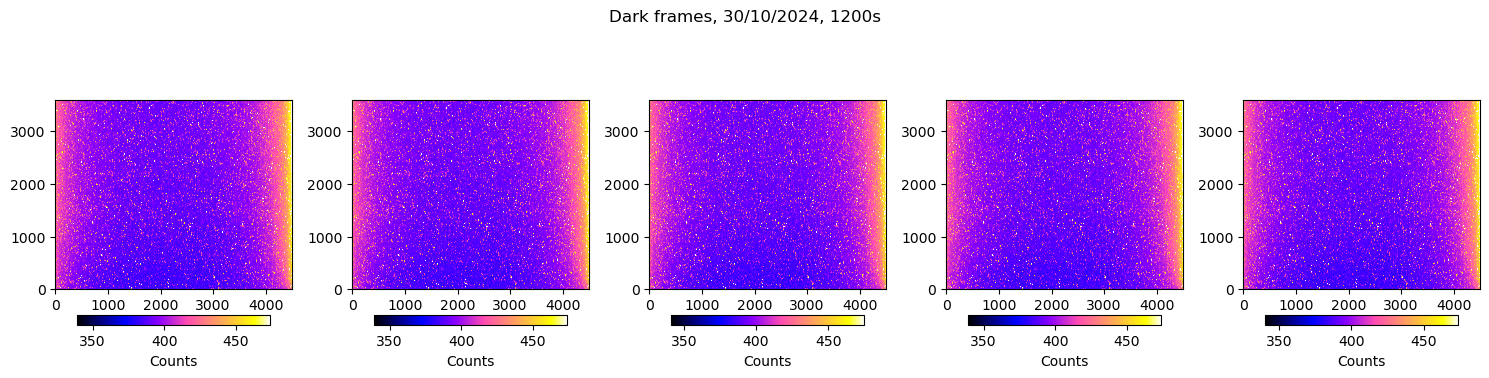

In [7]:
fig, ax = plt.subplots(1,5,figsize=(15,4))
fig.suptitle("Dark frames, 30/10/2024, 1200s")

dark_1200 = [entry["data"] for entry in dark if entry["exposure_time"] == 1200]

for i in range(5):
    
    im = ax[i].imshow(dark_1200[i], clim=np.quantile(dark_1200[i], [0.01, 0.99]), cmap='gnuplot2', origin='lower')  # Use clim to scale the image based on the 1st and 99th quantiles
    plt.colorbar(im, ax=ax[i], location='bottom', fraction=0.0375, pad=0.1, label="Counts")  # Make sure to use the `im` object for colorbar
    #ax[i].set(xlabel="X Pixel",ylabel="Y Pixel")

#plt.subplots_adjust(bottom=0.15) 
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

In [8]:
dark_1200_stack = np.stack(dark_1200, axis=0)  
dark_1200_mean = np.mean(dark_1200_stack, axis=0)  # or median?????

In [11]:
exp_times = [300,900,1200]
dark_mean_values = [np.mean(dark_300_mean),np.mean(dark_900_mean),np.mean(dark_1200_mean)]

In [12]:
masterdark_30_10_2024_fit = curve_fit(lambda x, a, b: a*x + b, exp_times, dark_mean_values)
a,b = masterdark_30_10_2024_fit[0][0], masterdark_30_10_2024_fit[0][1]

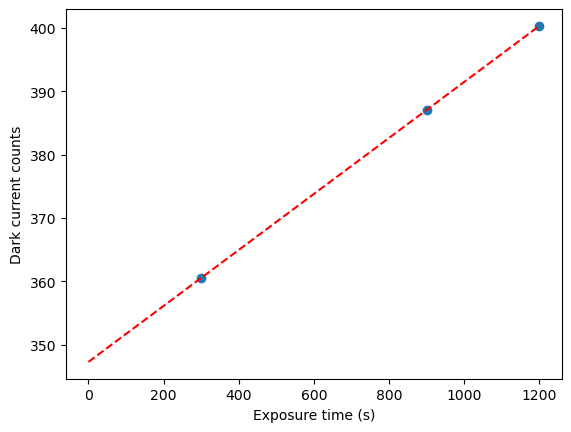

In [13]:
plt.scatter(exp_times,dark_mean_values)

t = np.linspace(0,1200,100)
plt.plot(t, a*t + b, linestyle='--', color='red')


plt.xlabel('Exposure time (s)')
plt.ylabel('Dark current counts')

plt.show()

In [14]:
# Save the master dark as a new FITS file

master_dark_filename = 'master_dark.fit'
hdu = fits.PrimaryHDU(dark_1200_mean)
hdu.writeto(master_dark_filename, overwrite=True)

In [ ]:
from scipy.optimize import curve_fit

masterdark_20241029_t_exp = np.array([300, 1200])
masterdark_20241029_mean = np.array([np.mean(masterdark_20241029_300), np.mean(masterdark_20241029_1200)])
masterdark_20241029_fit = curve_fit(lambda x, a, b: a*x + b, masterdark_20241029_t_exp, masterdark_20241029_mean)

masterdark_20241030_t_exp = np.array([300, 600, 900, 1200])
masterdark_20241030_mean = np.array([np.mean(masterdark_20241030_300), np.mean(masterdark_20241030_600), np.mean(masterdark_20241030_900), np.mean(masterdark_20241030_1200)])
masterdark_20241030_fit = curve_fit(lambda x, a, b: a*x + b, masterdark_20241030_t_exp, masterdark_20241030_mean)

x_dense = np.linspace(0, 1200, 1000)
plt.plot(masterdark_20241029_t_exp, masterdark_20241029_mean, 'o', color='red', label=f'29/10/2024 = {masterdark_20241029_fit[0][0]:.2f}t + {masterdark_20241029_fit[0][1]:.2f}')
plt.plot(x_dense, masterdark_20241029_fit[0][0]*x_dense + masterdark_20241029_fit[0][1], linestyle='--', color='red')
plt.plot(masterdark_20241030_t_exp, masterdark_20241030_mean, 'o', color='blue', label=f'30/10/2024 = {masterdark_20241030_fit[0][0]:.2f}t + {masterdark_20241030_fit[0][1]:.2f}')
plt.plot(x_dense, masterdark_20241030_fit[0][0]*x_dense + masterdark_20241030_fit[0][1], linestyle='--', color='blue')
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Exposure time (s)')
plt.ylabel('Dark current counts')
plt.legend();